In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
no_bag_on_carousel_after_i_minutes_if_bag_on_plane = np.linspace(1, 0, 11)
period_count = len(no_bag_on_carousel_after_i_minutes_if_bag_on_plane)
no_bag_on_carousel_after_i_minutes_if_bag_on_plane

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

# Simulation

In [3]:
def get_bag_appearances():
    return no_bag_on_carousel_after_i_minutes_if_bag_on_plane < np.random.rand()

In [4]:
get_bag_appearances()

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True])

In [5]:
pd.DataFrame([get_bag_appearances() for _ in range(5000)]).mean()

0     0.0000
1     0.1034
2     0.2030
3     0.3018
4     0.4006
5     0.4990
6     0.5892
7     0.6928
8     0.7924
9     0.8974
10    1.0000
dtype: float64

In [6]:
def sim(p_of_bag_on_plane, n=5000):
    records = []
    for _ in range(n):
        bag_on_plane = np.random.rand() < p_of_bag_on_plane
        if bag_on_plane:
            bag_appearances = get_bag_appearances()
        else:
            bag_appearances = [False] * period_count

        records.append([bag_on_plane, *bag_appearances])
    return pd.DataFrame(records, columns=["bag_on_plane", *range(period_count)])

In [7]:
sim_df = sim(0.5, 20_000)

In [8]:
sim_df

,bag_on_plane,0,1,2,3,4,5,6,7,8,9,10
0,True,False,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,True,True
2,True,False,False,False,False,False,False,False,False,False,False,True
3,True,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

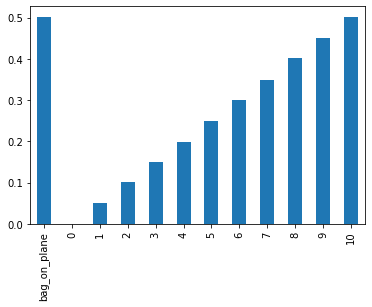

In [9]:
sim_df.mean().plot.bar()

In [10]:
sim_df.groupby("bag_on_plane").mean()

,0,1,2,3,4,5,6,7,8,9,10
bag_on_plane,,,,,,,,,,,
False,0.0,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
True,0.0,0.099691,0.20237,0.301364,0.39747,0.497162,0.596654,0.694353,0.800219,0.898217,1.0


## Simulation Results

In [11]:
# sim_df.groupby(4).mean()

In [12]:
true_solution = pd.Series(
    {
        i: sim_df.groupby(i).mean().loc[False, "bag_on_plane"]
        for i in range(period_count)
    }
)  # .plot()

# Solution

$P(A\mid B) = \frac{P(B\mid A)P(A)}{P(B)}$ 

- A: bag on plane
- B: x minutes passed without bag showing up

In [19]:
def get_nonupdated_solution(p_of_bag_on_plane=0.5):
    priors = []
    likelyhood_ratios = []
    posteriors = []
    evidence = []
    likelyhood = []
    for pba in no_bag_on_carousel_after_i_minutes_if_bag_on_plane:
        # calculate
        pb = (1 - p_of_bag_on_plane) + pba * p_of_bag_on_plane
        next_p = pba * p_of_bag_on_plane / pb
        # save variables
        priors.append(p_of_bag_on_plane)
        evidence.append(pb)
        likelyhood.append(pba)
        likelyhood_ratios.append(pba / pb)
        posteriors.append(next_p)
    return (
        pd.Series(priors),
        pd.Series(likelyhood_ratios),
        pd.Series(posteriors),
        pd.Series(likelyhood),
        pd.Series(evidence),
    )

In [20]:
no_bag_on_carousel_after_i_minutes_if_bag_on_plane_if_it_was_not_on_carousel_in_previous_period = no_bag_on_carousel_after_i_minutes_if_bag_on_plane / np.roll(
    no_bag_on_carousel_after_i_minutes_if_bag_on_plane, shift=1
)
no_bag_on_carousel_after_i_minutes_if_bag_on_plane_if_it_was_not_on_carousel_in_previous_period[
    0
] = 1

<ipython-input-20-3aa88aff51d1>:1: RuntimeWarning: divide by zero encountered in true_divide
  no_bag_on_carousel_after_i_minutes_if_bag_on_plane_if_it_was_not_on_carousel_in_previous_period = no_bag_on_carousel_after_i_minutes_if_bag_on_plane / np.roll(


In [21]:
def get_updated_solution(p_of_bag_on_plane=0.5):
    priors = []
    likelyhood_ratios = []
    posteriors = []
    evidence = []
    likelyhood = []
    for (
        pba
    ) in no_bag_on_carousel_after_i_minutes_if_bag_on_plane_if_it_was_not_on_carousel_in_previous_period:
        # calculate
        pb = (1 - p_of_bag_on_plane) + pba * p_of_bag_on_plane
        next_p = pba * p_of_bag_on_plane / pb
        # save variables
        priors.append(p_of_bag_on_plane)
        evidence.append(pb)
        likelyhood.append(pba)
        likelyhood_ratios.append(pba / pb)
        posteriors.append(next_p)
        # update
        p_of_bag_on_plane = next_p
    return (
        pd.Series(priors),
        pd.Series(likelyhood_ratios),
        pd.Series(posteriors),
        pd.Series(likelyhood),
        pd.Series(evidence),
    )

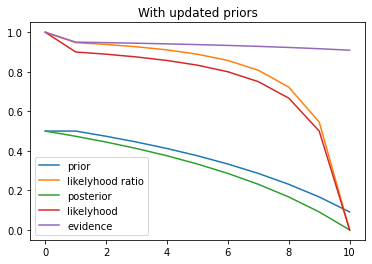

In [22]:
pd.DataFrame(
    {
        "prior": get_updated_solution()[0],
        "likelyhood ratio": get_updated_solution()[1],
        "posterior": get_updated_solution()[2],
        "likelyhood": get_updated_solution()[3],
        "evidence": get_updated_solution()[4],
    }
).plot()
plt.title("With updated priors")
plt.show()

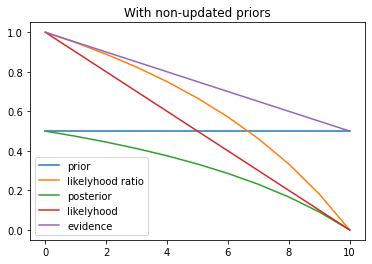

In [23]:
pd.DataFrame(
    {
        "prior": get_nonupdated_solution()[0],
        "likelyhood ratio": get_nonupdated_solution()[1],
        "posterior": get_nonupdated_solution()[2],
        "likelyhood": get_nonupdated_solution()[3],
        "evidence": get_nonupdated_solution()[4],
    }
).plot()
plt.title("With non-updated priors")
plt.show()